#### Front Matter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import NumpyClasses as npc
import utils as u
import importlib
from scipy.optimize import curve_fit
import sympy as sp

In [2]:
importlib.reload(u)

<module 'utils' from '/Users/roberto/scriptbelt/utils.py'>

In [117]:
importlib.reload(npc)

<module 'NumpyClasses' from '/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py'>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [4]:
plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 150

plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

### Functions

In [14]:
def isstring(s):
    return isinstance(s, str)

In [474]:
def nextto(s,string='ebeam1'):
    try:
        return s.split(string)[1].split('_')[1]
    except IndexError:
        return s

In [53]:
def measurementFromString(s,err='±'):
    return list(map(lambda x: float(x), s.split(err) ) )

#### tests

In [43]:
nextto(zhCS['Banner'][3],string='G3L')

'1e-10'

In [54]:
measurementFromString(zhCS['Cross section (pb)'][3])

[0.001381, 2.4e-07]

### Read the data from Excel

In [453]:
_zhCS=pd.read_excel("ZH.xlsx")

In [454]:
_zhCS['CleanBanner']=_zhCS['Banner'].apply(isstring)

In [455]:
zhCS=pd.DataFrame(_zhCS.query('CleanBanner==True') )

### Read the data from HTML (prototyping)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html

In [22]:
MGpage=pd.read_html("http://localhost:7000/CLICwzX/ee2zh/crossx.html",header=0)[-1]

In [25]:
MGpage['CleanBanner']=MGpage['Banner'].apply(u.isstring)

,Run,Collider,Banner,Cross section (pb),Events,Data,Output,Action,CleanBanner
1,run1_of_4__ebeam1_1500_ebeam2_1500_G3L_0__2019...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run2_ebeam1_1500_ebeam2_1500_G3L_0,0.001362 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
2,run2_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-10__...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run3_ebeam1_1500_ebeam2_1500_G3L_1e-10,0.001381 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
3,run3_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-11__...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run4_ebeam1_1500_ebeam2_1500_G3L_1e-11,0.001363 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
4,run4_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-9__2...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run5_ebeam1_1500_ebeam2_1500_G3L_1e-9,0.001563 ± 2.9e-07,100000,parton madevent,LHE,NaN,True
5,run1_of_14__ebeam1_7000_ebeam2_7000_G3L_0__201...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run2_ebeam1_7000_ebeam2_7000_G3L_0,6.226e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
6,run2_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-11_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run3_ebeam1_7000_ebeam2_7000_G3L_1e-11,6.415e-05 ± 1.2e-08,100000,parton madevent,LHE,NaN,True
7,run3_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-12_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run4_ebeam1_7000_ebeam2_7000_G3L_1e-12,6.243e-05 ± 1.2e-08,100000,parton madevent,LHE,NaN,True
8,run4_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-13_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run5_ebeam1_7000_ebeam2_7000_G3L_1e-13,6.226e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
9,run5_of_14__ebeam1_7000_ebeam2_7000_G3L_-1e-13...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run6_ebeam1_7000_ebeam2_7000_G3L_-1e-13,6.224e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
10,run6_of_14__ebeam1_7000_ebeam2_7000_G3L_-1e-12...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run7_ebeam1_7000_ebeam2_7000_G3L_-1e-12,6.206e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True


In [27]:
MGPage=pd.DataFrame((MGpage[MGPage['Banner'].str.contains('run')]).query('CleanBanner==True'))

In [28]:
MGPage

,Run,Collider,Banner,Cross section (pb),Events,Data,Output,Action,CleanBanner
1,run1_of_4__ebeam1_1500_ebeam2_1500_G3L_0__2019...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run2_ebeam1_1500_ebeam2_1500_G3L_0,0.001362 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
2,run2_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-10__...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run3_ebeam1_1500_ebeam2_1500_G3L_1e-10,0.001381 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
3,run3_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-11__...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run4_ebeam1_1500_ebeam2_1500_G3L_1e-11,0.001363 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
4,run4_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-9__2...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run5_ebeam1_1500_ebeam2_1500_G3L_1e-9,0.001563 ± 2.9e-07,100000,parton madevent,LHE,NaN,True
5,run1_of_14__ebeam1_7000_ebeam2_7000_G3L_0__201...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run2_ebeam1_7000_ebeam2_7000_G3L_0,6.226e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
6,run2_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-11_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run3_ebeam1_7000_ebeam2_7000_G3L_1e-11,6.415e-05 ± 1.2e-08,100000,parton madevent,LHE,NaN,True
7,run3_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-12_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run4_ebeam1_7000_ebeam2_7000_G3L_1e-12,6.243e-05 ± 1.2e-08,100000,parton madevent,LHE,NaN,True
8,run4_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-13_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run5_ebeam1_7000_ebeam2_7000_G3L_1e-13,6.226e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
9,run5_of_14__ebeam1_7000_ebeam2_7000_G3L_-1e-13...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run6_ebeam1_7000_ebeam2_7000_G3L_-1e-13,6.224e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
10,run6_of_14__ebeam1_7000_ebeam2_7000_G3L_-1e-12...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run7_ebeam1_7000_ebeam2_7000_G3L_-1e-12,6.206e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True


### Import data using function 

I have put this in my `utils.py`
```python
def MGPandasFromHTML(url):
    MGpage=pd.read_html(url,header=0)[-1]
    MGpage['CleanBanner']=MGpage['Banner'].apply(u.isstring)
    MGPage=pd.DataFrame((MGpage[MGpage['Banner'].str.contains('run')]).query('CleanBanner==True'))
    return MGPage
```

In [18]:
MGPage=u.MGPandasFromHTML('http://localhost:7000/CLICwzX/ee2zh/crossx.html')

In [19]:
MGPage

,Run,Collider,Banner,Cross section (pb),Events,Data,Output,Action,CleanBanner
1,run1_of_4__ebeam1_1500_ebeam2_1500_G3L_0__2019...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run2_ebeam1_1500_ebeam2_1500_G3L_0,0.001362 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
2,run2_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-10__...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run3_ebeam1_1500_ebeam2_1500_G3L_1e-10,0.001381 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
3,run3_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-11__...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run4_ebeam1_1500_ebeam2_1500_G3L_1e-11,0.001363 ± 2.4e-07,100000,parton madevent,LHE,NaN,True
4,run4_of_4__ebeam1_1500_ebeam2_1500_G3L_1e-9__2...,e+ e- 1500.0 x 1500.0 GeV,ee2zh_run5_ebeam1_1500_ebeam2_1500_G3L_1e-9,0.001563 ± 2.9e-07,100000,parton madevent,LHE,NaN,True
5,run1_of_14__ebeam1_7000_ebeam2_7000_G3L_0__201...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run2_ebeam1_7000_ebeam2_7000_G3L_0,6.226e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
6,run2_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-11_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run3_ebeam1_7000_ebeam2_7000_G3L_1e-11,6.415e-05 ± 1.2e-08,100000,parton madevent,LHE,NaN,True
7,run3_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-12_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run4_ebeam1_7000_ebeam2_7000_G3L_1e-12,6.243e-05 ± 1.2e-08,100000,parton madevent,LHE,NaN,True
8,run4_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-13_...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run5_ebeam1_7000_ebeam2_7000_G3L_1e-13,6.226e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
9,run5_of_14__ebeam1_7000_ebeam2_7000_G3L_-1e-13...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run6_ebeam1_7000_ebeam2_7000_G3L_-1e-13,6.224e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True
10,run6_of_14__ebeam1_7000_ebeam2_7000_G3L_-1e-12...,e+ e- 7000.0 x 7000.0 GeV,ee2zh_run7_ebeam1_7000_ebeam2_7000_G3L_-1e-12,6.206e-05 ± 1.1e-08,100000,parton madevent,LHE,NaN,True


### Create necessary new columns

In [329]:
zhCS['CrossSection in ab']=zhCS['Cross section (pb)'].apply(lambda x: 10**6*measurementFromString(x)[0])
zhCS['DeltaCrossSection in ab']=zhCS['Cross section (pb)'].apply(lambda x: 10**6*max(0.01*measurementFromString(x)[0],measurementFromString(x)[1]) )

In [330]:
for k in ['ebeam1','G3L']:
    zhCS[str(k)]=zhCS['Banner'].apply(lambda x: float(nextto(x,string=k) ) )

In [331]:
zhCS['G3L times TeV^2']=zhCS['G3L'].apply(lambda x: 10**6*x )

### Create necessary new columns

In [21]:
MGPage['CrossSection in ab']=MGPage['Cross section (pb)'].apply(lambda x: 10**6*u.measurementFromString(x)[0])
MGPage['DeltaCrossSection in ab']=MGPage['Cross section (pb)'].apply(lambda x: 10**6*max(0.01*u.measurementFromString(x)[0],u.measurementFromString(x)[1]) )

In [22]:
for k in ['ebeam1','G3L']:
    MGPage[str(k)]=MGPage['Banner'].apply(lambda x: float(u.nextto(x,string=k) ) )

In [23]:
MGPage['G3L times TeV^2']=MGPage['G3L'].apply(lambda x: 10**6*x )
MGPage['Sqrt{s} in TeV']=MGPage['ebeam1']*2/1000#.apply(lambda x: 10**6*x )

### Fit the columns (numerical function)

In [876]:
def luminosity(eb):
    if eb==1500:
        return 2*(0.8)**2*0.7*0.67*0.5
    if eb==15000:
        return 10*(eb/5000)**2*(0.8)**2*0.7*0.67
    if eb==7000:
        return 10*(eb/5000)**2*(0.8)**2*0.7*0.67

In [877]:
print('maximal 1/G3L=',str(1/eb**2))

maximal 1/G3L= 2.0408163265306123e-08


In [891]:
(14/10)**2*10

19.599999999999998

In [878]:
eb=1500
_data=MGPage.query('ebeam1=='+str(eb)+' & (-'+str(1/eb**2)+'<=G3L) & (G3L<='+str(1/eb**2)+')')[ ['G3L times TeV^2','CrossSection in ab','DeltaCrossSection in ab'] ]
_data

,G3L times TeV^2,CrossSection in ab,DeltaCrossSection in ab
1,0.00000,1362.0,13.62
2,0.00010,1381.0,13.81
3,0.00001,1363.0,13.63
4,0.00100,1563.0,15.63
19,0.00010,1381.0,13.81
20,0.00000,1362.0,13.62
21,0.01000,4425.0,44.25
22,-0.01000,634.0,6.34


In [879]:
def _fit(x,const,lin,quad):
    return const+x*lin+quad*x**2

In [880]:
fit_res = u.fit_pandas_data(_fit,_data)
print(fit_res.refined_parameters)

['1362(6)', '1.90(2) \\times 10^{5}', '1.17(2) \\times 10^{7}']


In [881]:
fit_res = u.fit_pandas_data(_fit,_data,p0=[13,10**5,10**9])
print(fit_res.refined_parameters)

['1362(6)', '1.90(2) \\times 10^{5}', '1.17(2) \\times 10^{7}']


In [882]:
fit_res.bestfit_sympy.subs(c95,0)

1361.78826813514

In [883]:
lab=("$  %s  +  %s \\cdot x +  %s  \\cdot x^2 $" % tuple( fit_res.refined_parameters  )).replace('\\times','\\cdot')
print(lab)

$  1362(6)  +  1.90(2) \cdot 10^{5} \cdot x +  1.17(2) \cdot 10^{7}  \cdot x^2 $


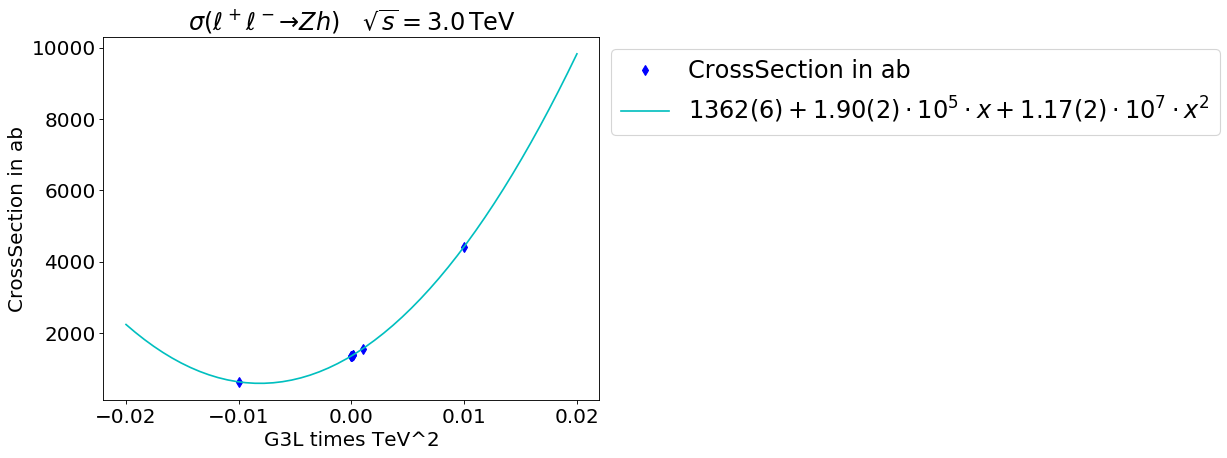

In [884]:
_xdata='G3L times TeV^2'
_ydata='CrossSection in ab'
_x=2*np.linspace(min(_data[_xdata]),max(_data[_xdata]))

plt.plot(_data[_xdata], _data[_ydata],'bd')
#plt.plot(_x, _fit( _x , fit_res.parameters[0],fit_res.parameters[1], fit_res.parameters[2] ),'c-', label=lab )
plt.plot(_x, fit_res.bestfit(_x) ,'c-', label=lab )

plt.legend(bbox_to_anchor=[1,1])
plt.xlabel(_xdata)
plt.ylabel(_ydata)
plt.title('$\\sigma(\\ell^+ \\ell^- \\to Zh ) \\quad \\sqrt{s}='+str(2*eb/1000)+'\,{\\rm TeV} $')
plt.xscale('linear')
plt.savefig(_ydata+_xdata+'_'+str(eb)+".pdf",bbox_inches='tight')

$$2\cdot \sqrt{\sigma(c=0) \cdot \mathcal{L}} = \left| \mathcal{L} \cdot \left( \sigma(c_{95}) - \sigma(c=0) \right) \right| $$
$$2\cdot \sqrt{\sigma(c=0) \cdot \mathcal{L}} - \mathcal{L} \cdot \left( \sigma(c_{95}) - \sigma(c=0) \right) $$

In [885]:
(sympy.diff(fit_res.bestfit_sympy, c95 )/fit_res.bestfit_sympy).subs(c95,0)

139.192127268571

In [886]:
luminosity(eb)

0.30016000000000004

In [887]:
_lumi=luminosity(eb)
c95 = sympy.symbols('c95',real=True,positive=False)
print('Expected events in the SM',_lumi*fit_res.bestfit(0))
fluctuation=2*np.sqrt( _lumi*fit_res.bestfit(0)) 
deviation= _lumi* sympy.Abs( fit_res.bestfit(c95) - fit_res.bestfit(0) )
expression=fluctuation - deviation

sols = sympy.solveset( sympy.Eq(deviation,fluctuation) ,c95,domain=sympy.S.Reals)
print(sols)
phys_sols=sorted(sols, key=lambda x: np.abs(x) )[0:2]

deviation.collect(c95)
list(map(lambda x: sympy.sign(x)/sympy.sqrt(sympy.Abs(x)), phys_sols ) ) 

Expected events in the SM 408.7543665634437
{-0.0169146319970614, -0.0154877154634129, -0.000744877144676916, 0.000682039388971616}


[38.2908733229153, -36.6401864989057]

In [888]:
np.sqrt(408/216*139/13)

4.494060657866246

is sympy


Text(0,0.5,'$\\mathcal{L}\\cdot \\left|  \\sigma_{BSM}-\\sigma_{SM} \\right| $')

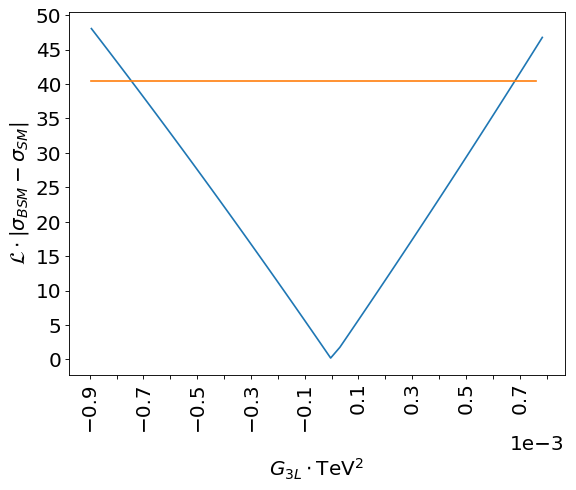

In [889]:
cmin=min(phys_sols)*(1-0.2*np.sign(min(phys_sols)))
cmax=max(phys_sols)*(1+0.2*np.sign(max(phys_sols)))
u.Plot(deviation,c95,cmin,cmax,fmt='-',PlotPoints=50)
u.Plot(fluctuation,None,cmin,cmax,fmt='-',lower_xtick_density=2,x_tick_rotation=90,xscilimits=(-1,1))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('\n$G_{3L} \cdot \\rm TeV^2$')
plt.ylabel('$\\mathcal{L}\\cdot \\left|  \\sigma_{BSM}-\\sigma_{SM} \\right| $')

In [890]:
MGPage.query('G3L==0')[['Sqrt{s} in TeV',"CrossSection in ab"]]#.to_latex()

,Sqrt{s} in TeV,CrossSection in ab
1,3.0,1362.00
5,14.0,62.26
12,30.0,13.55
20,3.0,1362.00


### Fit the columns sympy

In [678]:
expr=sympy.sympify('const+g*lin+quad*g**2+beta')

In [679]:
expr=sympy.sympify('const+g*lin+quad*g**2+gtp')
for _symbol in expr.free_symbols:
    print(_symbol)
    if len(str(_symbol))==1:# or u.isGreek(str(i)):
        print('adding ',_symbol,'to symbols')
        sympy.var(str(_symbol))
        #from sympy.abc import i


const
lin
gtp
quad
g
adding  g to symbols


I want the function to not be independent from its string representation. For this I want to use SymPy, which offers functions to print the function as a string, which I can then manipulate.

In [490]:
from sympy.utilities.lambdify import lambdify
import sympy
#import uncertainties
#from sympy import mathematica_code as mcode, symbols, sin

In [505]:
def variables_names(N):
    return ' '.join([  chr(97+i) for i in range(N) ])

In [500]:
named_parameters(3)

'a b c'

In [506]:
pars=sympy.symbols(variables_names(3), real=True)
x=sympy.symbols("x",real=True)
expression=pars[0]+x*pars[1]+pars[2]*x**2
_f=lambdify([x]+list(pars),expression,"numpy")

In [507]:
fit_res = u.fit_pandas_data(_f,_data,p0=[13,10**5,10**9])
print(fit_res.refined_parameters)

['62.2(2)', '1.89(2) \\times 10^{5}', '2.53(2) \\times 10^{8}']


In [509]:
replacements=[ (pars[ithpar],fit_res.refined_parameters[ithpar]) for ithpar in range(len(pars) ) ]
_expr=expression.subs(replacements)
lab=('$'+sympy.latex(_expr,mul_symbol='dot')+'$').replace('times','cdot')
lab

'$1.89(2) \\cdot 10^{5} \\cdot x + 2.53(2) \\cdot 10^{8} \\cdot x^{2} + 62.2(2)$'

In [510]:
print(_expr)

1.89(2) \times 10^{5}*x + 2.53(2) \times 10^{8}*x**2 + 62.2(2)


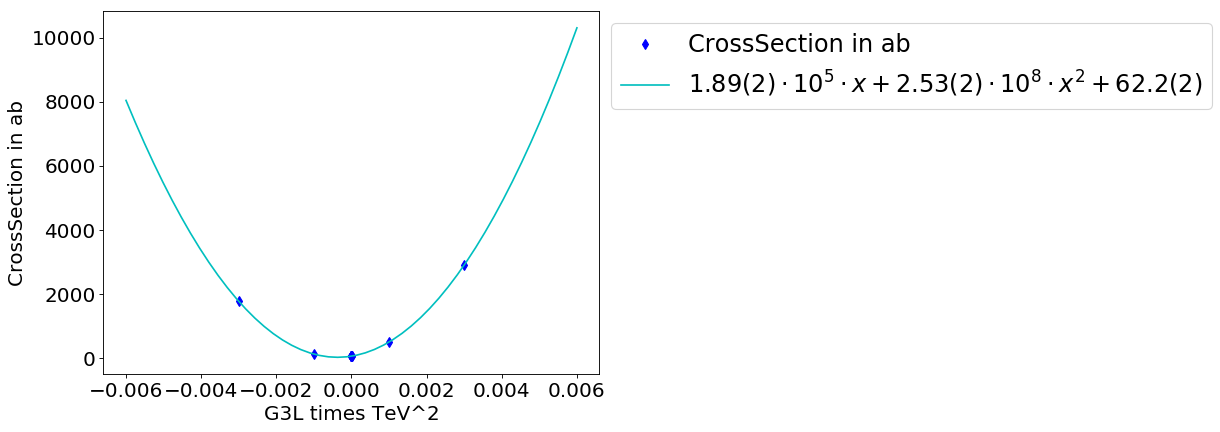

In [504]:
_x=2*np.linspace(min(_data[_xdata]),max(_data[_xdata]) )
_xdata='G3L times TeV^2'
_ydata='CrossSection in ab'
plt.plot(_data[_xdata], _data[_ydata],'bd')
plt.plot(_x, _f( _x , fit_res.parameters[0],fit_res.parameters[1], fit_res.parameters[2] ),'c-', label=lab )
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel(_xdata)
plt.ylabel(_ydata)
plt.xscale('linear')

### Specific plots (crap?)

In [137]:
zhCS.query('G3L==1e-13')

,Run,Collider,Banner,Cross section (pb),CleanBanner,ebeam1,G3L,CrossSection,DeltaCrossSection
21,run4_of_14__ebeam1_7000_ebeam2_7000_G3L_1e-13_...,e+ e-,ee2zh_run5_ebeam1_7000_ebeam2_7000_G3L_1e-13,6.226e-05 ± 1.1e-08,True,7000.0,1.000000e-13,0.000062,1.100000e-08
42,run11_of_14__ebeam1_15000_ebeam2_15000_G3L_1e-...,e+ e-,ee2zh_run12_ebeam1_15000_ebeam2_15000_G3L_1e-13,1.357e-05 ± 2.4e-09,True,15000.0,1.000000e-13,0.000014,2.400000e-09


In [142]:
def CrosSectionVsEnergyPlot(g3l,**kw):
    fig = plt.errorbar(\
                 zhCS.query('G3L=='+str(g3l))['ebeam1'],\
                 zhCS.query('G3L=='+str(g3l))['CrossSection'],\
                 zhCS.query('G3L=='+str(g3l))['DeltaCrossSection']\
                 ,**kw)
    plt.xscale('log')
    plt.yscale('log')
    return fig



In [192]:
def CrosSectionVsG3LPlot(energy,**kw):
    fig = plt.errorbar(\
                 zhCS.query('ebeam1=='+str(energy))['G3L'],\
                 10**6*zhCS.query('ebeam1=='+str(energy))['CrossSection'],\
                 10**6*zhCS.query('ebeam1=='+str(energy))['DeltaCrossSection']\
                 ,**kw)
    plt.xscale('linear')
    plt.yscale('linear')
    plt.title("$\\sqrt{s}=$"+str(2*energy/1000)+" TeV")
    plt.xlabel('G3L $[\\rm GeV^{-2}]$')
    plt.ylabel('$\\sigma(\\ell^+\\ell^- \\to ZH) \\rm\,\; [ab]$')
    return fig



<ErrorbarContainer object of 3 artists>

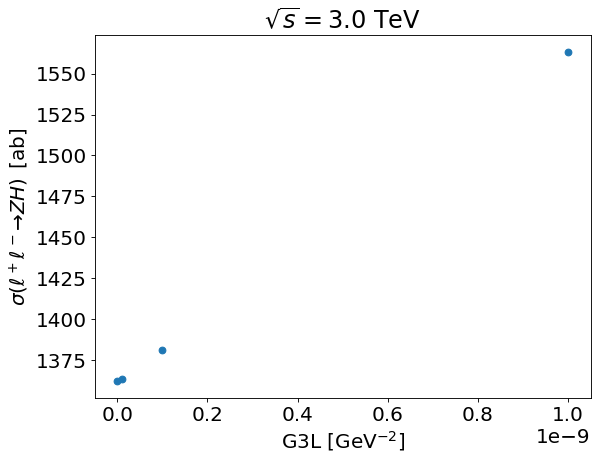

In [193]:
CrosSectionVsG3LPlot(1500,fmt='o')

<ErrorbarContainer object of 3 artists>

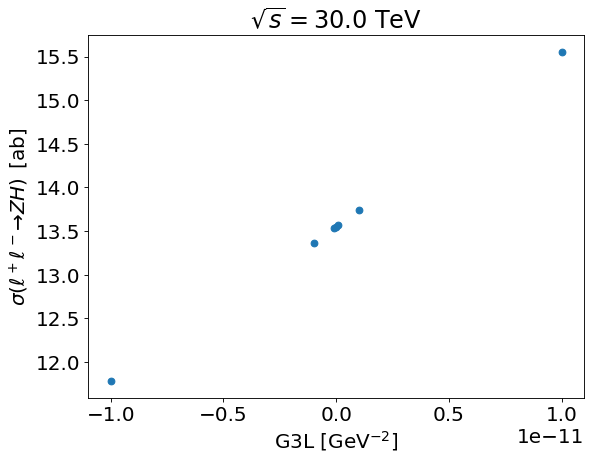

In [194]:
CrosSectionVsG3LPlot(15000,fmt='o')

<ErrorbarContainer object of 3 artists>

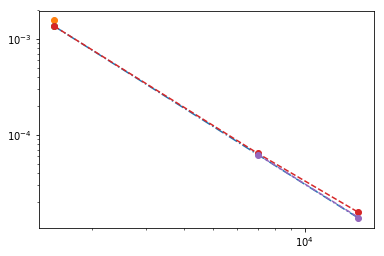

In [135]:
CrosSectionPlot(0,fmt='-.')
CrosSectionPlot(1e-9,fmt='o--')
CrosSectionPlot(1e-10,fmt='o--')
CrosSectionPlot(1e-11,fmt='o--')
CrosSectionPlot(1e-12,fmt='o--')